In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=9
paper='2110.11330'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me analyze this Hartree-Fock Hamiltonian for a triangular lattice step-by-step to create the appropriate implementation.

### Question 1: Dimension and Basis Order

First, I need to identify the flavors (or degrees of freedom) in the system to determine D. Looking at the Hamiltonian equation:

$$H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$$

I can see that the creation and annihilation operators are indexed by $\bm{k}$ (momentum) and $s$ (which appears to be a spin index).

The Hartree and Fock terms further confirm this:
$$H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$$
$$H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q)  \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s}$$

Here, operators are indexed by $s$ and $s'$, which suggests spin or possibly orbital degrees of freedom.

Since the proble

In [7]:
print(generated_code['thinking'])

Let me analyze this Hartree-Fock Hamiltonian for a triangular lattice step-by-step to create the appropriate implementation.

### Question 1: Dimension and Basis Order

First, I need to identify the flavors (or degrees of freedom) in the system to determine D. Looking at the Hamiltonian equation:

$$H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$$

I can see that the creation and annihilation operators are indexed by $\bm{k}$ (momentum) and $s$ (which appears to be a spin index).

The Hartree and Fock terms further confirm this:
$$H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$$
$$H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q)  \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s}$$

Here, operators are indexed by $s$ and $s'$, which suggests spin or possibly orbital degrees of freedom.

Since the problem doesn't explicitly state what $s$ represents, but g

In [8]:
print(generated_code['text'])

# Hartree-Fock Hamiltonian for Triangular Lattice System

## 1) Number of Flavors, D = (2,)
Basis Order:
0: spin_up
1: spin_down

## 2) EXP-VAL DEPENDENT TERMS:
```
r"\langle c_{k,s}^\dagger c_{k,s}\rangle": "The average density for spin s, calculated as np.mean(exp_val[s, s, :])",
r"\langle c_{k,s}^\dagger c_{k,s'} \rangle": "The more general spin correlation, accessed as exp_val[s, s', k_idx]"
```

TERMS:
- $-\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$ -> H[s, s, k], NI (diagonal terms for each spin)
- $H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$ -> H[s', s', k'], I (diagonal terms for each spin)
- $H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q) \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s}$ -> Both diagonal H[s, s, q] and off-diagonal H[s, s', q] terms, I

## 3) CODE:

```python
import numpy as np
from typing import Any
from HF import *

clas

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with spin-dependent 
    hopping and interaction terms.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float, optional): Filling factor of the system. Default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t': 1.0, 'U0': 1.0, 'U1': 0.5}, filling_factor: float=0.5):
        self.lattice = 'triangular'  # Lattice symmetry
        self.D = (2,)  # Number of flavors (spin up/down)
        self.basis_order = {'0': 'spin'}
        # Order for each flavor:
        # 0: spin up, 1: spin down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to 0
        self.a = parameters.get('a', 1.0)  

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2110_11330_9.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

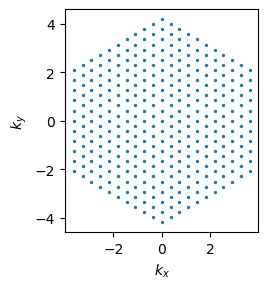

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [19]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [20]:
h_nonint = ham.generate_non_interacting()

In [21]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

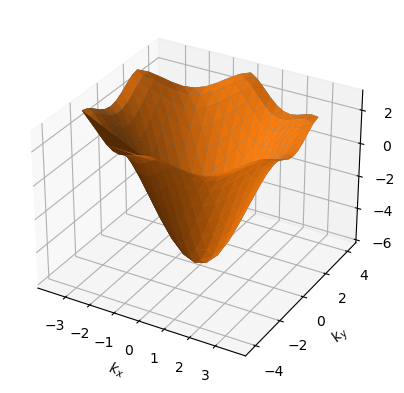

In [22]:
utils_auto.plot_2d_bandstructure(ham,en)

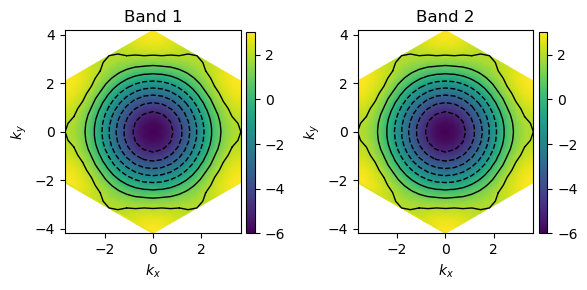

In [23]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [24]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [25]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [26]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 0


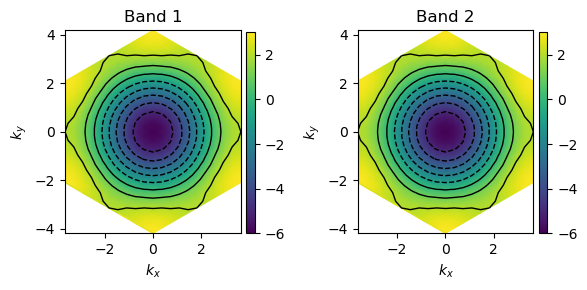

In [27]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit + Large T limit (T=U)i

In [28]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)
setattr(ham_int,'T',1e5/1.8)


In [29]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [30]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 19


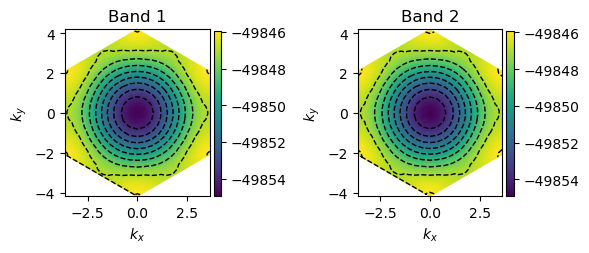

In [31]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [32]:
utils_auto.print_gap(ham_int,exp_val,en_int,1)

Gap is -8.97
U/T is 23694.15
mean_U is 24999.77


# Auto eval

## Task 1

In [33]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and check it against the rubric to determine if it's correct or not.

The image shows a hexagonal arrangement of points in a 2D k-space (momentum space), with axes labeled kx and ky. The points form a discrete mesh covering what appears to be the first Brillouin zone of a 2D system.

Let's check against the rubric:

1. "This image should show momentum space mesh in the first Brillouin zone of the concerned problem."
   - The image clearly shows a momentum space mesh (discrete k-points) arranged in what appears to be a hexagonal pattern.
   - For a triangular lattice (as specified in the problem), the first Brillouin zone is indeed hexagonal in shape, which matches what we see in the image.
   - The mesh covers the entire Brillouin zone symmetrically.

2. "You need to check the point group symmetry."
   - The point group symmetry for a triangular lattice is C6v (6-fold rotational symmetry with mirror planes).


In [34]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [35]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I need to carefully analyze the band structure plots shown in the image based on the given rubric. Let me go through the checklist step-by-step:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see two plots labeled "Band 1" and "Band 2". The boundary of the colored region in both plots appears to have a hexagonal shape, which is indeed the expected Brillouin zone shape for a triangular lattice. The Brillouin zone of a triangular lattice should be a regular hexagon, and that seems to be what's shown here.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:
    
2.1 Identify the highest energy regions (yellow)
In both Band 1 and Band 2 plots, the highest energy regions (yellow) appear at the corners of the hexagonal Brillouin zone.

2.2 Trace the pattern of energy variation across the zone
The 

In [36]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [37]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze this image and evaluate it based on the rubric provided:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

From the image, I can see that the Brillouin zone boundary has a hexagonal shape, which is indeed the expected shape for a triangular lattice in 2D reciprocal space. The hexagonal boundary is clearly visible in both Band 1 and Band 2 plots.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:
   
2.1 Identify the highest energy regions (yellow)
The highest energy regions (yellow) appear at the corners of the hexagonal Brillouin zone.

2.2 Trace the pattern of energy variation across the zone
The energy varies from highest (yellow) at the corners of the hexagon, gradually decreasing (green, cyan) as we move inward, reaching the lowest energy (purple) at the center of the Brillouin zone. This pattern is c

In [38]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [39]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int='U=1e5 and T=1e5/1.8, so the gap should smear to 0'
    ))


#################### THINKING ####################

Let's analyze the image provided, which shows two band structure plots labeled "Band 1" and "Band 2" for a triangular lattice system calculated using the Hartree-Fock method.

Going through the rubric step by step:

1. Shape of the Brillouin zone boundary:
   - The Brillouin zone boundary shown in the plots appears to be hexagonal, which is consistent with a triangular lattice. The boundary is shown by the dashed line enclosing the colored region.
   - This is correct for a triangular lattice, which should have a hexagonal first Brillouin zone.

2. Symmetry of the energy distribution:
   
   2.1 Highest energy regions (yellow):
   - In both Band 1 and Band 2, the highest energy regions (yellow) appear to be at the boundary of the Brillouin zone, forming a hexagonal pattern.
   
   2.2 Pattern of energy variation:
   - The energy varies radially from the center (purple, lowest energy) to the boundary (yellow, highest energy).
   - The

In [40]:
answer4=utils_auto.extract_result_content(result4['text'])

In [41]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '9' saved to final_answer.yaml
